In [46]:
import os, sys
sys.path.append(os.path.abspath("../.."))
sys.path.append(os.path.abspath("../../projective2d"))
import cv2
import projective2d as p2
import projective2d.utils as u
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [47]:
img = cv2.imread("transformed.jpg")

First try affine extraction using length ratios.

In [48]:
l1_points = np.array([[-2, 0], [0, 0], [2, 0.0]])
l1_tr_points = np.array([[45, 131], [121, 87], [178, 56.0]])
l2_points = np.array([[0, -1], [0, 0], [0, 3.0]])
l2_tr_points = np.array([[155, 109], [121, 87], [51, 39.0]])
points_list = [l1_points, l1_tr_points, l2_points, l2_tr_points]
tr_points = np.concat([l1_tr_points, l2_tr_points], axis=0)

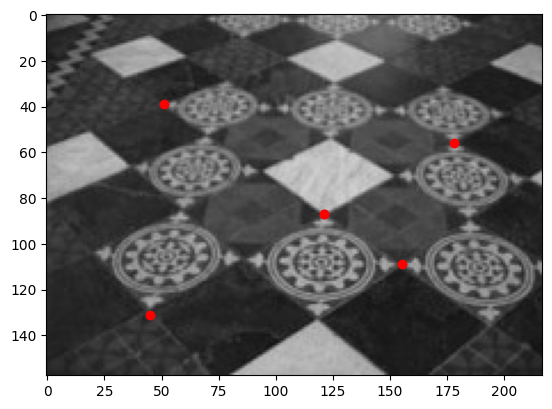

In [49]:
plt.imshow(img)
plt.scatter(*tr_points.T, c="red")
plt.show()

In [50]:
points_list = [u.canonical_embed_array(points) for points in points_list]

In [51]:
H, id1, id2 = p2.transforms.affine_extraction_with_length_ratios(*points_list)
old_image_center = u.canonical_embed(l2_tr_points[0])
image_center = np.array([img.shape[1] / 2.0, img.shape[0] / 2.0, 1.0])
H = p2.transforms.transform_remove_euclidean(H, old_image_center, image_center, 1.0)

Plot the transformed points.

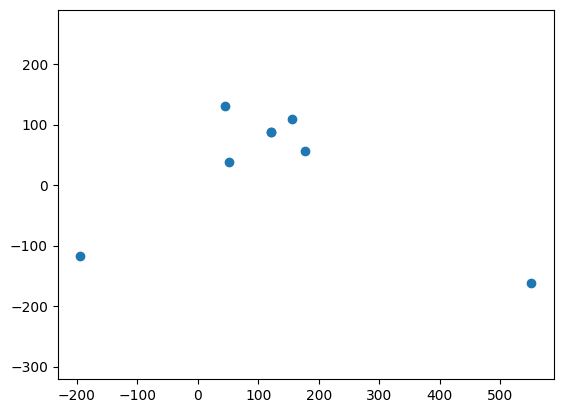

In [52]:
euclidian_pts = list(l1_tr_points) + list(l2_tr_points)
pts = euclidian_pts + [id1, id2]
pts = np.array(pts)
plt.scatter(pts[:, 0], pts[:, 1])
plt.axis("equal")
plt.show()

Plot the points after affine extraction.

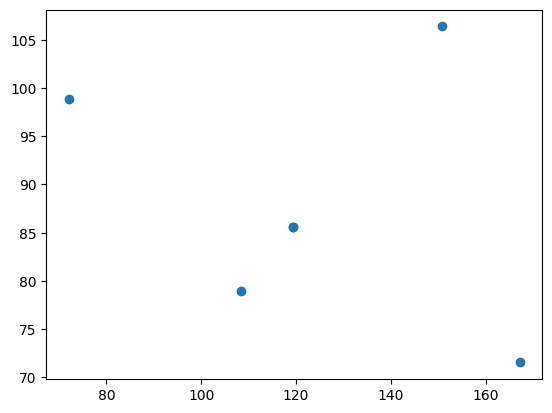

In [53]:
euclidian_pts = np.array([u.canonical_unembed(H @ u.canonical_embed(p)) for p in euclidian_pts])
plt.scatter(*euclidian_pts.T)
plt.show()

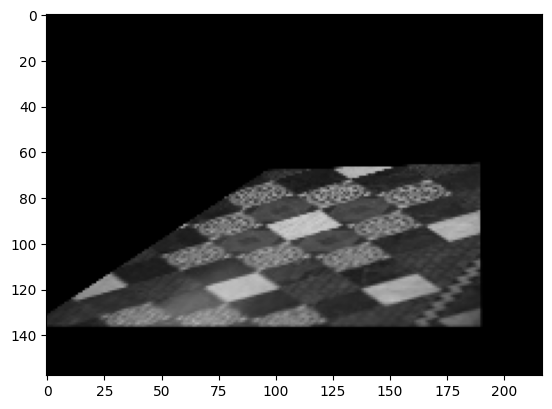

In [54]:
transformed = cv2.warpPerspective(img, H, (img.shape[1], img.shape[0]))
plt.imshow(transformed)
plt.show()

Then affine extraction with orthogonal lines.

In [55]:
rectangle = np.array([[22, 103], [154, 109], [150, 42], [51, 39.0]])

In [56]:
rectangle = u.canonical_embed_array(rectangle)
H = p2.transforms.affine_extraction_with_orthogonal_lines(rectangle)
H = p2.transforms.transform_remove_euclidean(H, old_image_center, image_center, 1.0)

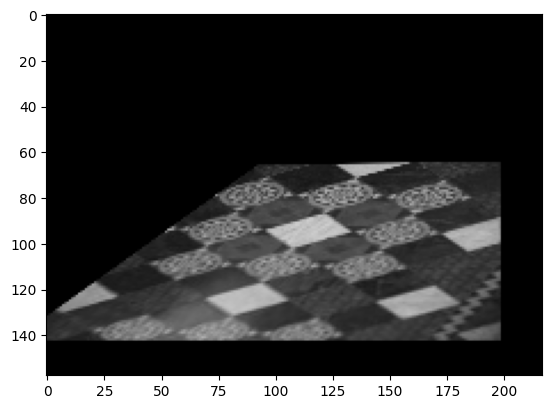

In [57]:
transformed = cv2.warpPerspective(img, H, (img.shape[1], img.shape[0]))
plt.imshow(transformed)
plt.show()